In [49]:
from bs4 import BeautifulSoup
import requests

# with open("nasa.htm") as html_file:
#     soup = BeautifulSoup(html_file, 'lxml')
# print(soup.prettify())

url = requests.get('https://www.usajobs.gov/GetJob/ViewDetails/576145500#locations').text
soup = BeautifulSoup(url, 'lxml')
print(soup)


<!DOCTYPE html>
<html lang="en">
<head>
<title>USAJOBS - Job Announcement</title>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="noindex,nofollow" name="robots"/>
<!-- Facebook Open Graph -->
<meta content="https://media.usajobs.gov/agencylogos/NN21.gif" property="og:image"/>
<meta content="Computer Scientist, AST, Computer Research and Development" property="og:title"/>
<meta content="https://www.usajobs.gov:443/GetJob/ViewDetails/576145500" property="og:url"/>
<meta content="The Intelligent Systems Division at NASA Ames Research Center is seeking applicants for the position of Computer Scientist to support the Center's Intelligent Adaptive Systems (IAS) core competency. This position serves as project/team lead and innovator to guide and create software and tools applicable to the IAS core competency, covering the spectrum of research, design, and developmen

In [140]:
# print(soup.find(id='duties').h3.text)
# print(soup.find(id='duties').p)
# print(soup.findAll('h3')[2].text)
# print(soup.findAll(id='duties')[1].text)
# print(soup.find(id="qualifications").text)
print(soup.find(id="qualifications").text)

# print(soup.find(id="requirements").findAll('div')[2].h3.text)
# print(soup.find(id="requirements").findAll('div')[2].p.text)



 Qualifications

                                                In addition to the basic education requirement, you must have one year of specialized experience equivalent to the next lower grade level, which has equipped you with the particular competencies needed to successfully perform the duties of the position described above.To qualify for the GS-14:Specialized experience equivalent to the next lower grade level (GS-13) includes duties such as conducting research and development for intelligent adaptive systems that support either in-flight autonomy or ground-based autonomous support operations;  experience in model, algorithm, hardware and/or software development for engineered or information systems.To qualify for the GS-15:Specialized experience equivalent to the next lower grade level (GS-14) includes duties such as leading, providing technical guidance to, or technical oversight of engineers/scientists researching, designing, analyzing, developing, deploying, and/or operat

In [142]:
title = soup.find('h1').text
dept = soup.find('h5', class_='usajobs-joa-banner__dept').text
loc = soup.find('a', class_='usajobs-joa-banner__agency').text
summary_title = soup.find(id='duties').h3.text #summary title
summary_text = soup.find(id='duties').p.text #summary text
response_title = soup.findAll('h3')[2].text #responsibilities title
response_text = soup.findAll(id='duties')[1].text #responsibilities text
qual = soup.find(id="qualifications").text # qualifications title and text
edu_title = soup.find(id="requirements").findAll('div')[2].h3.text #education title
edu_text = soup.find(id="requirements").findAll('div')[2].p.text  #education text


print(title, dept, loc)
print(summary_title, end='\n\n')
print(summary_text, end='\n\n')
print(response_title)
print(response_text)
print(qual)
print(edu_title)
print(edu_text)


                    Computer Scientist, AST, Computer Research and Development 
                 National Aeronautics and Space Administration 
                    Ames Research Center
                
 Summary

The Intelligent Systems Division at NASA Ames Research Center is seeking applicants for the position of Computer Scientist to support the Center's Intelligent Adaptive Systems (IAS) core competency. This position serves as project/team lead and innovator to guide and create software and tools applicable to the IAS core competency, covering the spectrum of research, design, and development phases, as well as project implementation and operation phases on flight missions.

Responsibilities


Serves as team lead and senior software development lead, project manager, principal investigator, deployment lead, and/or laboratory manager providing high-level technical leadership.
Supports a range of aeronautics/aerospace projects/programs (e.g., aviation, airborne science, small spacec

In [146]:
file = open("nasa-test.txt", "x")

datas = [title, dept, loc, summary_title, summary_text, response_title, response_text, qual, edu_title, edu_text]

for data in datas:
    file.write(data)
file.close()

In [26]:
output = open("nasa-test.txt", 'r')
output_lines = output.read().lower()
output_words = output_lines.split()


from nltk.corpus import stopwords
output_words = [word for word in output_words if word not in stopwords.words('english')]



def unique_words(histogram):
    count = 0
    for i in range(len(histogram)):
        j=0
        for j in range(i):
            if (histogram[i] == histogram[j]):
                break
        if (i == j + 1): 
            count += 1
    return count

print(unique_words(output_words))

393


In [27]:
# IMPORTS
import sys

# output = open('nasa-test.txt', 'r')
# output_lines = poem.read().lower()
# output_words = poem_lines.split()

def histogram(source):
    hist = {}
    b = []
    for i in source:
        hist[i] = hist.get(i, 0) + 1
        a = i, ' => ', hist[i]
        b.append(a)
    return b


histogram(output_words)
# type(histogram(output_words))

[('operations', ' => ', 1),
 ('research', ' => ', 1),
 ('analyst', ' => ', 1),
 ('(data', ' => ', 1),
 ('scientist)', ' => ', 1),
 ('department', ' => ', 1),
 ('army', ' => ', 1),
 ('united', ' => ', 1),
 ('states', ' => ', 1),
 ('army', ' => ', 2),
 ('futures', ' => ', 1),
 ('command', ' => ', 1),
 ('summarythis', ' => ', 1),
 ('direct', ' => ', 1),
 ('hire', ' => ', 1),
 ('authority', ' => ', 1),
 ('(dha)', ' => ', 1),
 ('solicitation', ' => ', 1),
 ('utilizing', ' => ', 1),
 ('dha', ' => ', 1),
 ('certain', ' => ', 1),
 ('personnel', ' => ', 1),
 ('dod', ' => ', 1),
 ('workforce', ' => ', 1),
 ('recruit', ' => ', 1),
 ('appoint', ' => ', 1),
 ('qualified', ' => ', 1),
 ('candidates', ' => ', 1),
 ('positions', ' => ', 1),
 ('competitive', ' => ', 1),
 ('service.', ' => ', 1),
 ('position:', ' => ', 1),
 ('position', ' => ', 1),
 ('serves', ' => ', 1),
 ('operations', ' => ', 2),
 ('research', ' => ', 2),
 ('analyst', ' => ', 2),
 ('(data', ' => ', 2),
 ('scientist)', ' => ', 2),
 ('

In [28]:
import csv

# opening the csv file in 'w+' mode 
data = open('data.csv', 'w+', newline ='') 
  

# writing the data into the file 
with data:     
    write = csv.writer(data) 
    write.writerows(histogram(output_words)) 

# print(data)

In [29]:
import pandas as pd

data = pd.read_csv('data.csv', header=None)
print(data.columns)

data.head()

Int64Index([0, 1, 2], dtype='int64')


,0,1,2
0,operations,=>,1
1,research,=>,1
2,analyst,=>,1
3,(data,=>,1
4,scientist),=>,1


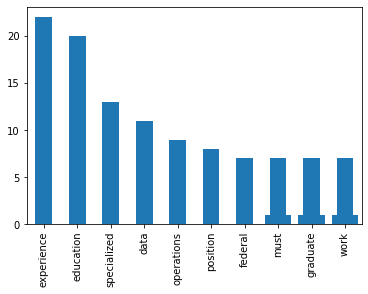

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [31]:
import matplotlib.pyplot as plt
top_10 = data[0].value_counts()[:10]
plt.bar(top_10, height = 1)

top_10.plot(kind='bar')
plt.show(top_10)